# **Trabajo práctico integrador**

**Nombre**: Jhoan Carlo Flores Luna

## **Primera Parte (Clase 1 y 2)**

In [77]:
import numpy as np
import matplotlib.pyplot as plt

## **Primer ejercicio**

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

**Nota**: La función norma_matrix genera una matrix aleatoria de *nrows* filas y *ncoln* columnas. Si se desea incluir una matrix en especifico se ha de modificar la función. Fue creada de esta forma solo para fines de mostrar un ejemplo del cálculo de las normas.

In [78]:
np.random.seed(12345)

def norma_matrx(nrows,ncolm):
  m=np.random.rand(nrows,ncolm)
  n_l0=np.count_nonzero(m!=0, axis=1)
  n_l1=np.sum(abs(m), axis=1)
  n_l2=(np.sum(abs(m)**2, axis=1))**(1/2)
  n_inf=np.max(abs(m), axis=1)
  print("\nLa norma l0 es:" + str(n_l0))
  print("\nLa norma l1 es:" + str(n_l1))
  print("\nLa norma l2 es:" + str(n_l2))
  print("\nLa norma Infinito es:" + str(n_inf))

In [79]:
norma_matrx(10,15)


La norma l0 es:[15 15 15 15 15 15 15 15 15 15]

La norma l1 es:[7.94046653 9.98180399 7.48898076 7.85628484 8.2030343  7.53565013
 7.8206519  8.91427049 7.5373265  6.52290383]

La norma l2 es:[2.37606647 2.71668277 2.30234252 2.26312279 2.30950178 2.1598728
 2.41296404 2.47450077 2.22491883 1.96552501]

La norma Infinito es:[0.96451452 0.99401459 0.90372254 0.92817055 0.97322998 0.94537183
 0.94990574 0.95966101 0.94154629 0.90897516]


## **Segundo Ejercicio**

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [80]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

Creamos una función, tal que recorra el vector y genere un contador que va contando las veces en que se cumplen las condiciones TP, TN, FP o FN. Y al final me devuelve las tres métricas solicitadas: *Precisión*, *recall* y *accuracy*.

In [81]:
def acc_predict(t,p):
  tp=0; tn=0; fn=0; fp=0
  for i in list(range(0,len(t))):
    if t[i]==1 and p[i]==1:
      tp += 1
    if t[i]==0 and p[i]==0:
      tn += 1
    if t[i]==1 and p[i]==0:
      fn += 1
    if t[i]==0 and p[i]==1:
      fp += 1
  print("Precision:",str(tp/(tp+fp)))
  print("Recall:", str(tp/(tp+fn)))
  print("Accuracy:",str((tp+tn)/(tp+tn+fp+fn)))

In [82]:
acc_predict(truth,prediction)

Precision: 0.5
Recall: 0.5
Accuracy: 0.4


Se incluye un ejemplo adicional para verificar que la función es extrapolable a otros vectores de mayor tamaño.

In [83]:
t=np.random.binomial(n=1, p=0.25, size=[100000])
p=np.random.binomial(n=1, p=0.78, size=[100000])
acc_predict(t,p)

Precision: 0.25025267063263607
Recall: 0.7815958764534303
Accuracy: 0.3593


## **Tercer y Cuarto Ejercicio**

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [84]:
#Cargamos todas las librerias y funciones a ser utilziadas en ambos ejercicios:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans   
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### **Ejercicio tercero: Base de datos HAR**

In [85]:
#Cargando la base de datos:
path_data="/content/Base_HAR_train"
X_train = np.loadtxt(os.path.join(path_data, "X_train.txt"))
y_train = np.loadtxt(os.path.join(path_data, "y_train.txt")).astype(int)

A modo de EDI (muy escueto) exploramos las categorias del target:


*   1 walking
*   2 walking upstairs 
*   3 walking downstairs
*   4 sitting
*   5 standing 
*   6 laying

In [86]:
#Confirmamos la existencia de 6 categorías en la base de datos: 
np.unique(y_train).size

6

In [87]:
#1.- Estandarizando los datos:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(X_train)
standardized_data.shape

(7352, 561)

In [88]:
#2.-Calculando los PC:
pca = decomposition.PCA()
pca.n_components = 200
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(7352, 200)

In [89]:
#3.-Calculando la varianza acumulada por cada componente:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained

array([0.51107777, 0.57730781, 0.60555268, 0.63075325, 0.64975755,
       0.66710849, 0.68090678, 0.69297468, 0.70299733, 0.71271026,
       0.72136609, 0.72942037, 0.73710948, 0.74360427, 0.74996818,
       0.75600397, 0.76190921, 0.7677003 , 0.77341603, 0.7787229 ,
       0.78375872, 0.78867421, 0.79348703, 0.79820279, 0.80272458,
       0.80696193, 0.8111686 , 0.81525039, 0.81916062, 0.82305569,
       0.82673882, 0.83030715, 0.83380896, 0.83720252, 0.84052049,
       0.84382375, 0.84704966, 0.85002482, 0.85291049, 0.85577957,
       0.85848452, 0.8611578 , 0.8638088 , 0.86641395, 0.86892052,
       0.87140594, 0.87382822, 0.87620456, 0.87852216, 0.88081247,
       0.88302827, 0.88517667, 0.88726708, 0.88930507, 0.89131571,
       0.89330594, 0.89526117, 0.89717577, 0.89906852, 0.90094265,
       0.90276899, 0.90455421, 0.90632639, 0.90807037, 0.90978873,
       0.91148505, 0.91315186, 0.91479337, 0.91638793, 0.91797303,
       0.9195131 , 0.92104495, 0.92253586, 0.92400597, 0.92546

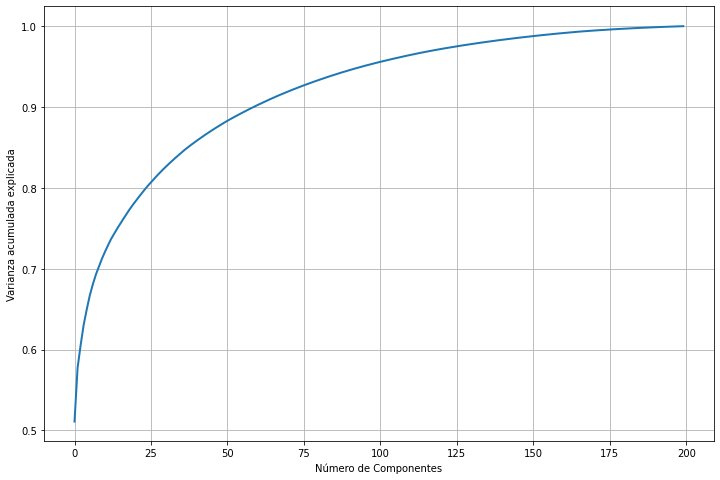

In [90]:
#5.- Graficando la varianza acumulada por cada componente:
plt.figure(1, figsize=(12, 8))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()

In [91]:
#Calculando la cantidad de componentes requeridos para explicar el 80% de la varianza:
pca = decomposition.PCA(n_components=0.8, whiten=True)
X_pca=pca.fit_transform(standardized_data)
X_pca.shape[1]

26

In [92]:
#Utilizaremos un gráfico 3D con las 3 primeras componente, para ver si existen clusters naturales:
import plotly.offline as py
def plot_pca_3d(points, out):
    scatter = {
        'mode':"markers",
        'name': "y",
        'type': "scatter3d",    
        'x': points[:,0], 
        'y': points[:,1], 
        'z': points[:,2],
        'marker': {'size':3, 'color':out, 'colorscale':'Rainbow'}
    }
    fig = {'data':[scatter], 'layout': {'title':"3 Primeras Componentes"}}
    py.iplot(fig)

plot_pca_3d(pca_data, y_train)

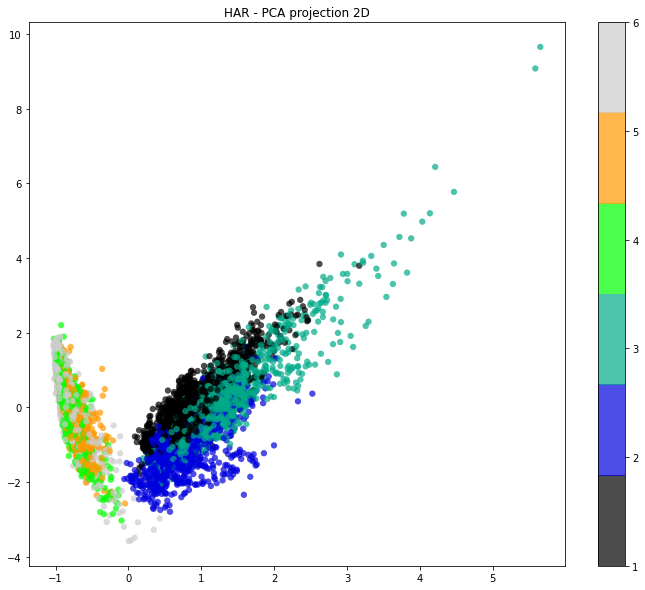

In [93]:
# Graficamos los primeros dos componentes en 2D:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

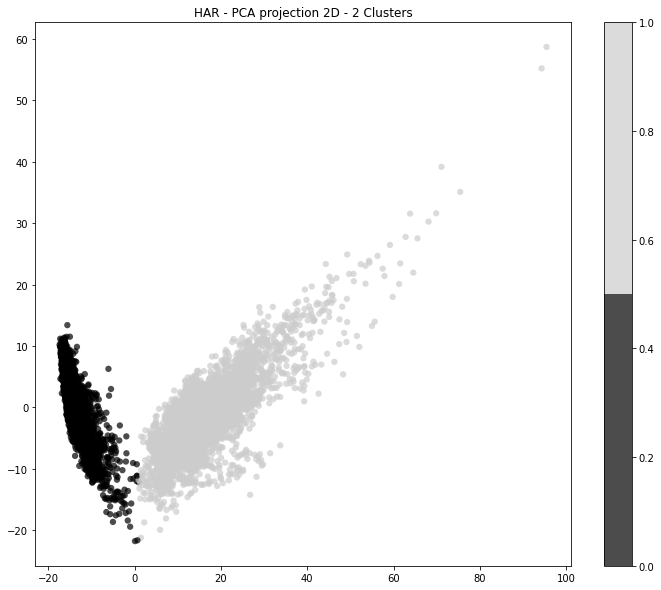

In [94]:
#Utilizamos un K-Means para realizar los clusters: Iniciamos con 2 clusters para ver el comportamiento de los datos:
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=123)
kmeans_move.fit(pca_data)
cluster_labels_mov = kmeans_move.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D - 2 Clusters');

In [95]:
tab = pd.crosstab(y_train, cluster_labels_mov, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
Caminar,0,1226,1226
Subir escaleras,8,1065,1073
Bajar escaleras,0,986,986
Estar parado,1285,1,1286
Estar sentado,1374,0,1374
Recostarse,1396,11,1407
Todos,4063,3289,7352


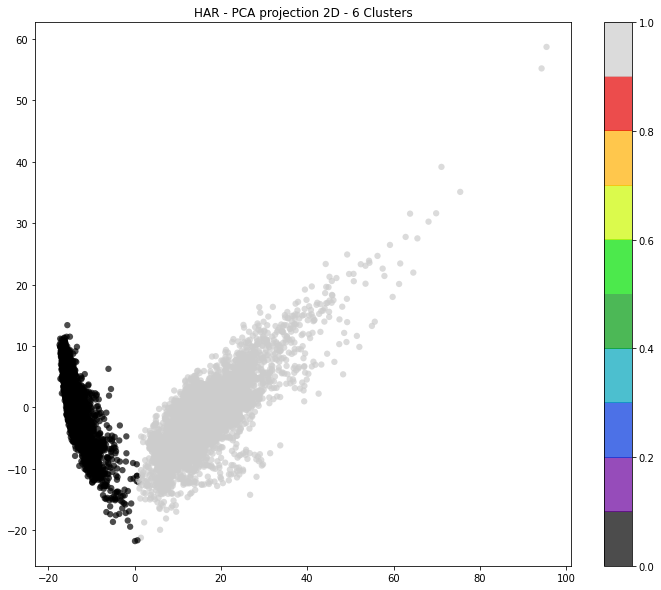

In [96]:
#Analizamos ahora con 6 clusters para comparar como se comporta con los componentes principales y estos a su vez con los datos originales:
kmeans_move = KMeans(n_clusters=6, n_init=100, random_state=123)
kmeans_move.fit(pca_data)
cluster_labels_mov2 = kmeans_move.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('HAR - PCA projection 2D - 6 Clusters');

In [97]:
tab = pd.crosstab(y_train, cluster_labels_mov2, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(6)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,Todos
Caminar,511,0,68,647,0,0,1226
Subir escaleras,211,0,4,856,2,0,1073
Bajar escaleras,619,0,166,201,0,0,986
Estar parado,0,890,0,1,309,86,1286
Estar sentado,0,1003,0,0,371,0,1374
Recostarse,0,26,0,4,270,1107,1407
Todos,1341,1919,238,1709,952,1193,7352


### **Ejercicio Cuarto: Base de datos MNIST**

In [98]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [99]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


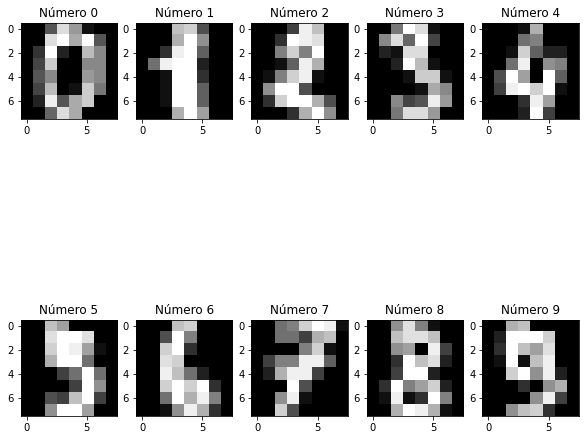

In [100]:
# Cargamos una muestra para inspeccionar los datos:
plt.figure(figsize=(10,10))
x_row=2
y_col=5

for i in list(range(x_row*y_col)):
  plt.subplot(x_row,y_col,i+1)
  plt.title("Número {}".format(y[i]))
  plt.imshow(X[i, :].reshape((8, 8)), cmap='gray')
plt.show()

In [101]:
#Transformando los a dataset:
X, y = load_digits(as_frame=True, return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))
X, y

Formato del dataset: (1797, 64)


(      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0           0.0  

In [102]:
#1.- Estandarizando los datos:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(X)
standardized_data.shape

(1797, 64)

In [103]:
#2.-Calculando la VarCov Matrix: Uno de los supuestos del PCA es la alta autocorrelación entre los datos
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape
cov_matrix

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 1797.        , 1000.24274805, ...,  -53.67680568,
          47.70526302,  -78.86818082],
       [   0.        , 1000.24274805, 1797.        , ...,  -74.00534619,
         130.46007281,  148.29407457],
       ...,
       [   0.        ,  -53.67680568,  -74.00534619, ..., 1797.        ,
        1165.04498809,  470.79812324],
       [   0.        ,   47.70526302,  130.46007281, ..., 1165.04498809,
        1797.        , 1114.90928957],
       [   0.        ,  -78.86818082,  148.29407457, ...,  470.79812324,
        1114.90928957, 1797.        ]])

In [104]:
#3.-Calculando los PC:
pca = decomposition.PCA()
pca.n_components = 64
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(1797, 64)

In [105]:
pca_data = np.vstack((pca_data.T, y)).T
pca_data

array([[ 1.91421366e+00, -9.54501571e-01, -3.94603482e+00, ...,
        -0.00000000e+00,  8.24385469e-15,  0.00000000e+00],
       [ 5.88980330e-01,  9.24635800e-01,  3.92475494e+00, ...,
         2.36499414e-16,  3.08670512e-17,  1.00000000e+00],
       [ 1.30203906e+00, -3.17188827e-01,  3.02333293e+00, ...,
         9.93874541e-17,  2.15555254e-17,  2.00000000e+00],
       ...,
       [ 1.02259599e+00, -1.47910870e-01,  2.46997365e+00, ...,
        -5.29244606e-17,  1.79387514e-17,  8.00000000e+00],
       [ 1.07605522e+00, -3.80906254e-01, -2.45548693e+00, ...,
        -1.28131011e-17, -2.28690666e-17,  9.00000000e+00],
       [-1.25770233e+00, -2.22759088e+00,  2.83627891e-01, ...,
        -8.13385869e-18,  5.00149356e-17,  8.00000000e+00]])

In [106]:
#4.-Calculando la varianza acumulada por cada componente:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

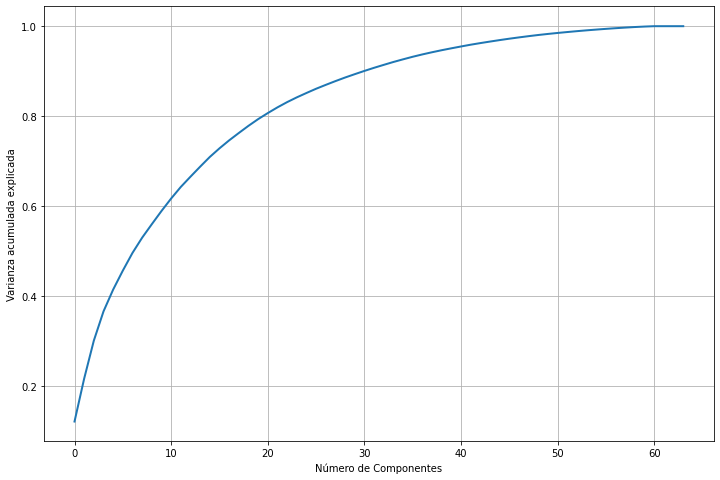

In [107]:
#5.- Graficando la varianza acumulada por cada componente:
plt.figure(1, figsize=(12, 8))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()

In [108]:
#Calculando la cantidad de componentes requeridos para explicar el 80% de la varianza:
pca = decomposition.PCA(n_components=0.8, whiten=True)
X_pca=pca.fit_transform(standardized_data)
X_pca.shape[1]

21

Se puede apreciar que aproximadamente las 21 primeras componentes explican el 80% de los datos

In [116]:
eigenvalues=pca.components_
eigenvalues.shape

(21, 64)

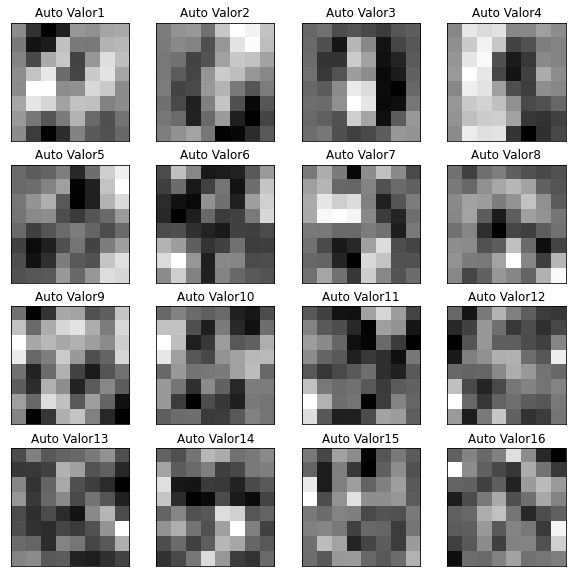

In [122]:
#Graficando los eigen values:
plt.figure(figsize=(10,10))
x_row=4
y_col=4

for i in list(range(x_row*y_col)):
  plt.subplot(x_row,y_col,i+1)
  plt.imshow(eigenvalues[i].reshape(8,8),cmap='gray')
  title_='Auto Valor'+str(i+1)
  plt.title(title_)
  plt.xticks(())
  plt.yticks(())
plt.show()  

Se aprecia como la varianza de una imagen ha sido descompuesto a través de todos los auto valores (que en agregado me dan la imagen original).

In [123]:
#Utilizaremos un gráfico 3D con las 3 primeras componente, para ver si existen clusters naturales:
import plotly.offline as py
def plot_pca_3d(points, out):
    scatter = {
        'mode':"markers",
        'name': "y",
        'type': "scatter3d",    
        'x': points[:,0], 
        'y': points[:,1], 
        'z': points[:,2],
        'marker': {'size':3, 'color':out, 'colorscale':'Rainbow'}
    }
    fig = {'data':[scatter], 'layout': {'title':"3 Primeras Componentes"}}
    py.iplot(fig)

plot_pca_3d(pca_data, y)

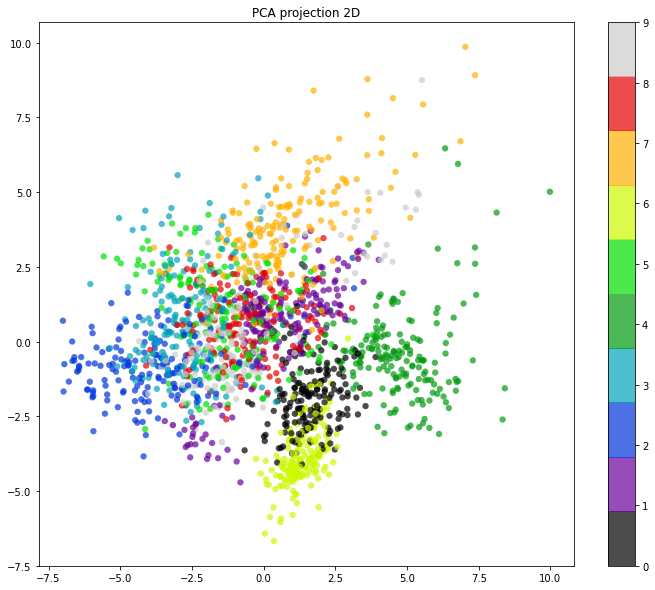

In [124]:
# Graficamos los primeros dos componentes para iniciar el análizis de clusterización usando las componentes:
plt.figure(figsize=(12,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection 2D');

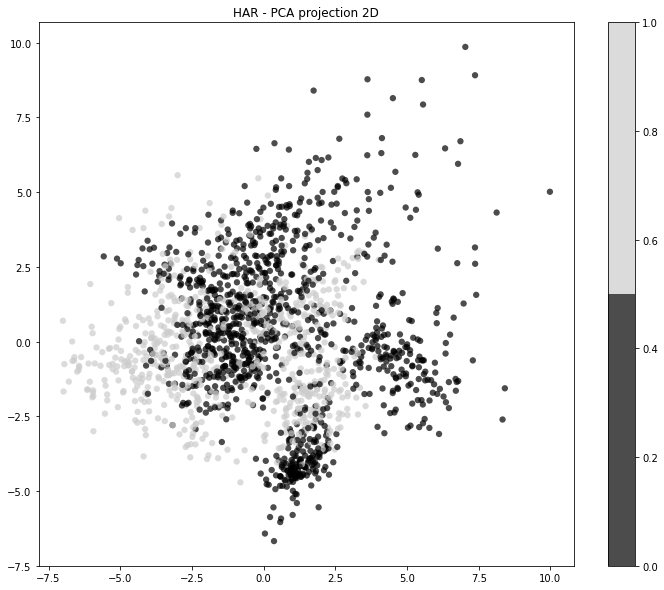

In [125]:
#Utilizamos un K-Means para realizar los clusters: Iniciamos con 2 clusters para ver el comportamiento de los datos:
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=123)
kmeans_move.fit(pca_data)
cluster_labels_mov = kmeans_move.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

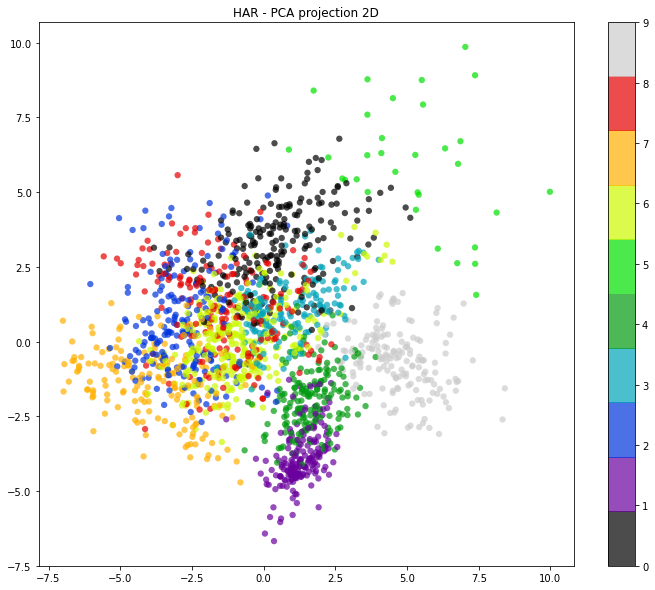

In [126]:
#Analizamos ahora con 10 clusters para compara como se comporta con los componentes principales y estos a su vez con los datos originales:
kmeans_move = KMeans(n_clusters=10, n_init=100, random_state=123)
kmeans_move.fit(pca_data)
cluster_labels_mov = kmeans_move.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

Del análisis podemos concluir que: 
1.   La varianza de los datos es explicada por las 21 primeras cada
2.   Qué usando las componentes para clusterizar muestra un buen desempeño en comparación a los datos obesrvados, comprobando que las componentes recojen la varianza de los datos.

### **Quinto y Sexto Ejercicio:**

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error
# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [128]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [129]:
df = pd.DataFrame(new_data)
new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
df.columns = new_col
df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


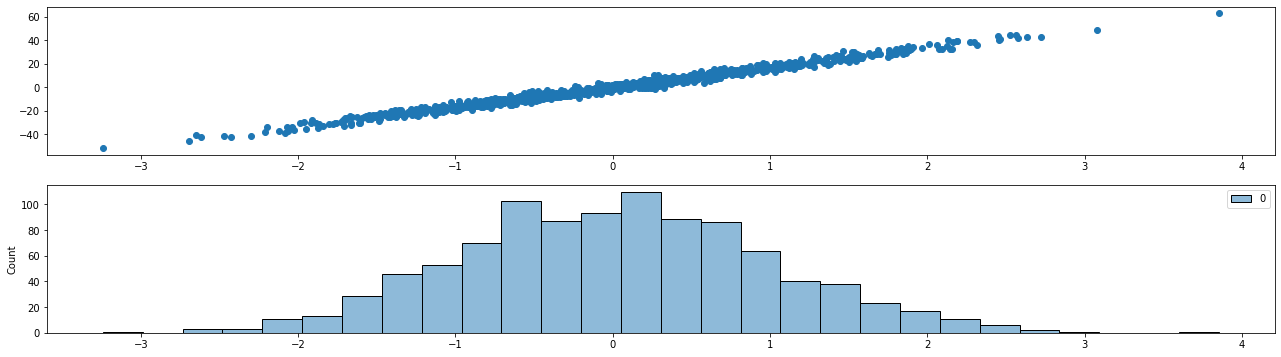

In [130]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

Funciones auxiliares para generar datos anómalos

In [131]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [132]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

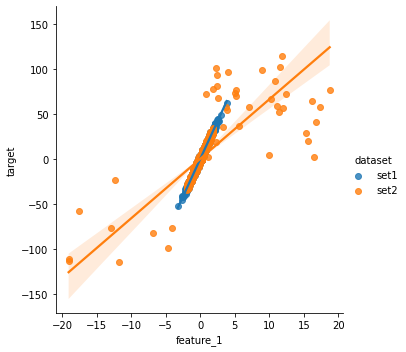

In [133]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### **Quinto ejercicio**

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [134]:
#Generando la función para el split de los datos:
def split_mydata(data,var_y,perc_train,perc_val):
  #Seleccionando el target y explicativas
  y=data.loc[:, data.columns == var_y]
  X=data.loc[:, data.columns != var_y]
  
  #generando aleatorios
  permuted_idxs = np.random.permutation(X.shape[0])
  #Generando los indices para train, val y test:
  train_idxs = permuted_idxs[0:int(perc_train * X.shape[0])]
  val_idxs = permuted_idxs[int(perc_train * X.shape[0]): int(perc_train * X.shape[0]) + int(perc_val * X.shape[0])]

  perc_test=1 - (perc_train + perc_val)
  test_idxs = permuted_idxs[int(perc_train * X.shape[0]) + int(perc_val * X.shape[0]):X.shape[0]]

  #Generando las bases:
  X_train = X.iloc[train_idxs]
  X_val = X.iloc[val_idxs]
  X_test = X.iloc[test_idxs]
  
  y_train = y.iloc[train_idxs]
  y_val = y.iloc[val_idxs]
  y_test = y.iloc[test_idxs]
  
  return X_train,X_val, X_test, y_train,y_val, y_test

In [135]:
#Un ejemplo: Utilizaremos una base de datos y luego tomaremos una variable y solo 20 obs para validar el código anterior
import pandas as pd
data= pd.read_csv('/content/sample_data/california_housing_train.csv')
data_ejemplo=data.iloc[:,[2,3,4]].sample(n = 20)
print(data_ejemplo)

       housing_median_age  total_rooms  total_bedrooms
16888                11.0       1804.0           506.0
4306                 36.0       1589.0           265.0
5308                 23.0       2573.0           688.0
14638                52.0       1555.0           289.0
13574                31.0       3340.0           735.0
703                  16.0       4046.0           731.0
3216                 40.0       1251.0           336.0
12663                19.0       3461.0           634.0
1843                 23.0       2145.0           379.0
11290                16.0       2534.0           557.0
10893                11.0       2285.0           499.0
2391                 17.0       3583.0           700.0
8310                 52.0       1010.0           244.0
15193                52.0       2640.0           366.0
12606                10.0       3258.0           612.0
7741                 29.0       1821.0           588.0
16701                26.0       2191.0           495.0
3431      

In [136]:
split_mydata(data_ejemplo,'total_rooms',0.7,0.2)

(       housing_median_age  total_bedrooms
 703                  16.0           731.0
 13574                31.0           735.0
 3431                 16.0           216.0
 15448                34.0           284.0
 12663                19.0           634.0
 16701                26.0           495.0
 8310                 52.0           244.0
 15193                52.0           366.0
 16888                11.0           506.0
 12606                10.0           612.0
 3216                 40.0           336.0
 8789                 32.0           355.0
 11290                16.0           557.0
 5308                 23.0           688.0,
        housing_median_age  total_bedrooms
 4306                 36.0           265.0
 14638                52.0           289.0
 7741                 29.0           588.0
 1843                 23.0           379.0,
        housing_median_age  total_bedrooms
 10893                11.0           499.0
 2391                 17.0           700.0,
        

Como podemos validar, la función separó correctamente la base de train, test y validación; en las proporciones requeridas.

### **Sexto ejercicio**

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Text(0.5, 1.0, 'Graph (a)')

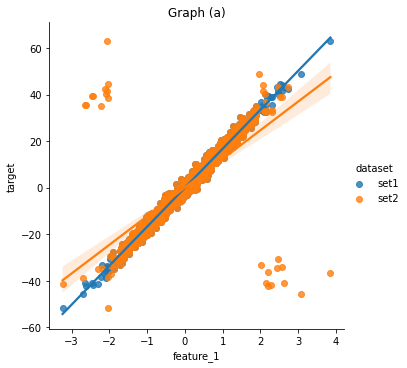

In [137]:
#Modificamos el extreme_outlier igual a False (según requerimiento del ejercicio) y probamos con un percentage=0.05 igual 
# que el ejemplo anterior:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')
ax = plt.gca()
ax.set_title("Graph (a)")

Como apreciamos ya existe una diferencia en la generación de los outliers comparados con el gráfico anterior.
Ahora utilizaremos diferentes valores para el percentage= para ver como este cambia con cada uno de ellos:

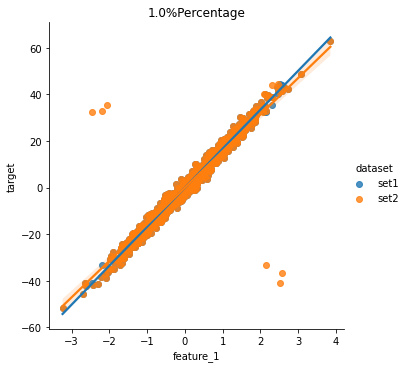

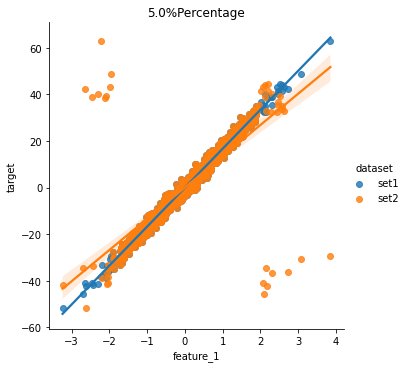

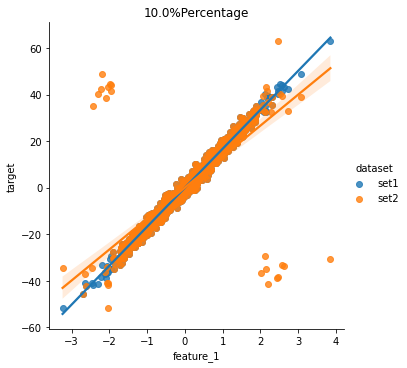

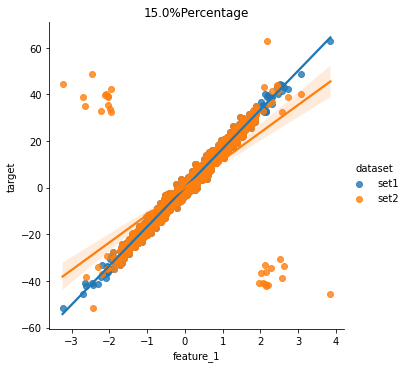

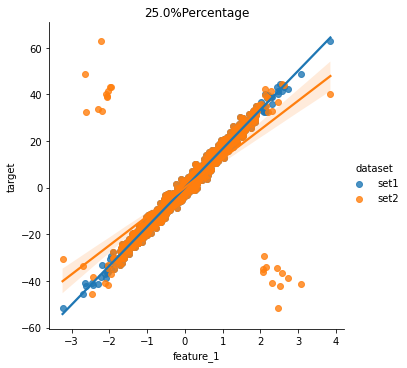

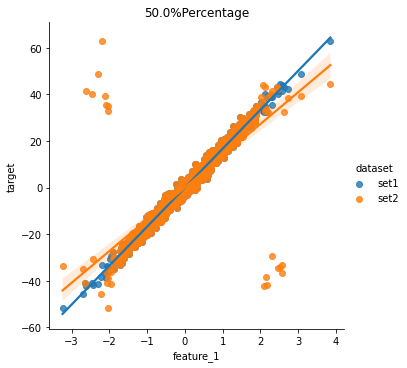

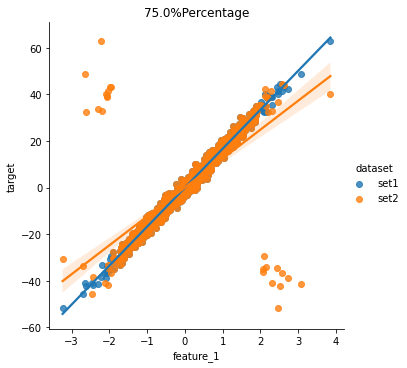

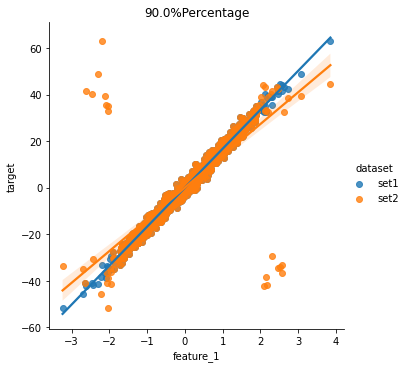

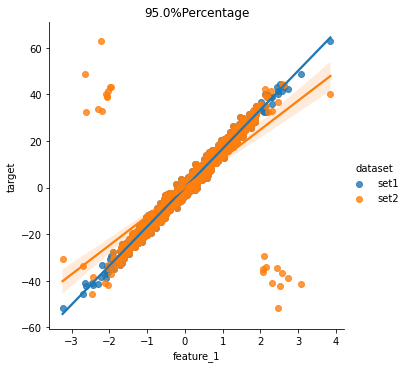

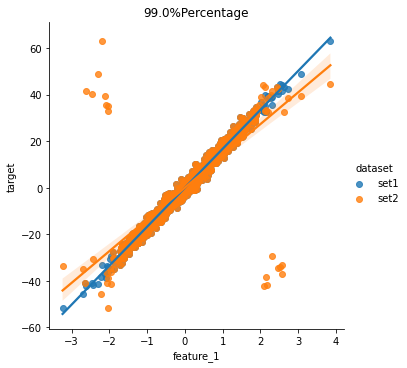

In [138]:
for perc in [0.01, 0.05, 0.1, 0.15,  0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
  df_outlier = generate_outliers(df,['feature_1'], percentage = perc, extreme_outlier = False, two_tailed= True)
  sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')
  ax = plt.gca()
  ax.set_title(str(perc*100)+ '%' + '' + 'Percentage')

Como vemos, a medida que movemos el valor percentage; las dos curvas se van diferenciando. Esto a consecuenica de la creación de los outliers.